# Explore here

### Paso 1: Cargar el conjunto de datos

In [4]:
import pandas as pd

# Carga directa desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
total_data = pd.read_csv(url, parse_dates=['date'], index_col='date')

total_data.head()


,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


### Paso 2: Construcción y análisis de la serie temporal

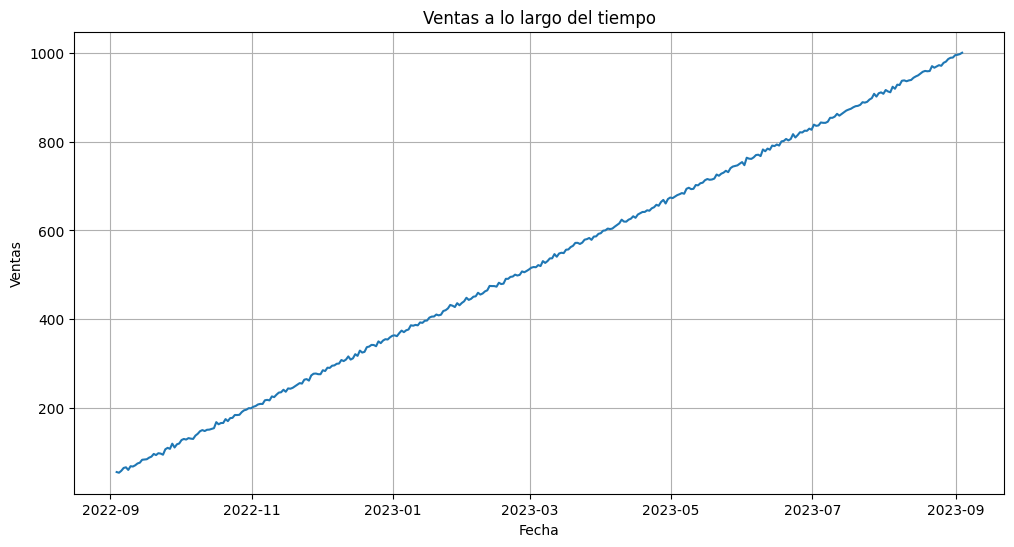

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizamos la serie temporal
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_data, x=total_data.index, y='sales')
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid()
plt.show()

¿Cuál es el tensor de la serie temporal?
* Las fechas son de un día lo que implica que el tensor es diario.

¿Cuál es la tendencia?
* Se puede  observar una tendencia creciente si las ventas aumentan a lo largo del tiempo.

¿Es estacionaria?
* A continuación se hará la prueba Dickey-Fuller:

In [6]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller

result = adfuller(total_data['sales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063


Si el p-value > 0.05, la serie **no es estacionaria**.  En este caso, donde p-value es casi 1, concluimos que **"no es estacionaria"**.

¿Existe variabilidad o ruido?
➤ Se pueden apreciar fluctuaciones irregulares. Para velor las claro haremos una descomsición Estacional:

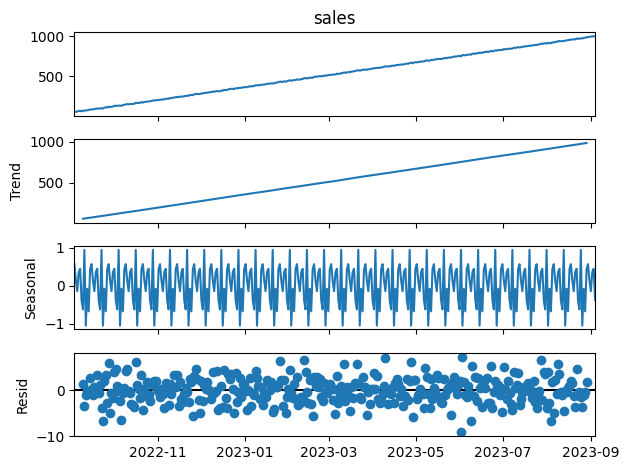

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(total_data['sales'], model='additive', period=12)
decomposition.plot()
plt.tight_layout()
plt.show()


###  Paso 3: Entrenamiento del modelo ARIMA

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Si no es estacionaria, aplicar transformaciones como diferencia
Total_data_diff = total_data['sales'].diff().dropna()

# Entrenamiento - ajustar manualmente los parámetros (p,d,q) o usar auto_arima (opcional con pmdarima)
model = ARIMA(total_data['sales'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1049.226
Date:                Sun, 13 Jul 2025   AIC                           2104.453
Time:                        14:58:00   BIC                           2116.152
Sample:                    09-03-2022   HQIC                          2109.102
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   2025.703      0.000       0.999       1.001
ma.L1         -0.9996      0.440     -2.271      0.023      -1.862      -0.137
sigma2        18.1480      8.139      2.230      0.0

### Paso 4: Predicción y evaluación

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


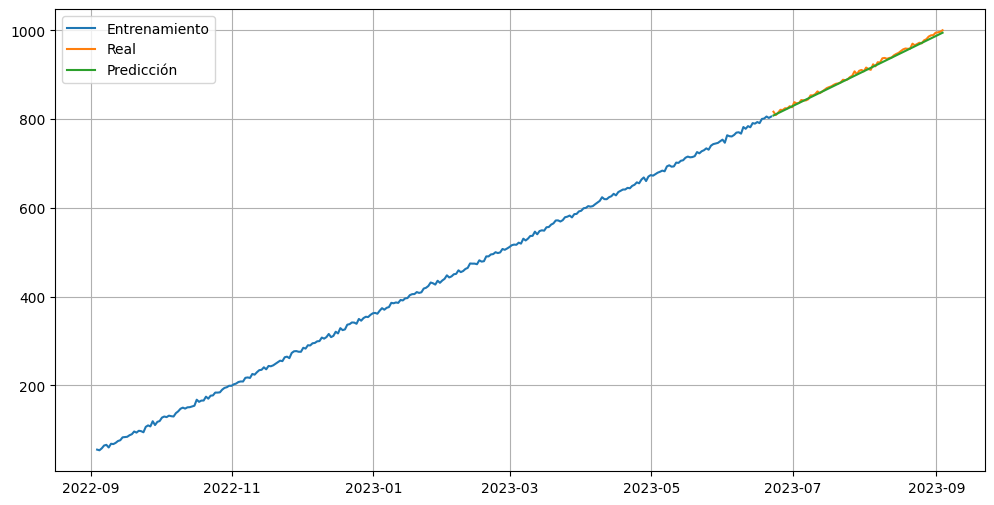

In [15]:
# División (por ejemplo, 80% entrenamiento, 20% test)
train_size = int(len(total_data) * 0.8)
train, test = total_data['sales'][:train_size], total_data['sales'][train_size:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Predicción
forecast = model_fit.forecast(steps=len(test))

# Visualizar predicción vs datos reales
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Real')
plt.plot(test.index, forecast, label='Predicción')
plt.legend()
plt.grid()
plt.show()


In [13]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, forecast)
print(f"MSE: {mse:.2f}")


MSE: 16.66


### Paso 5: Guardar el modelo

In [14]:
import joblib

joblib.dump(model_fit, 'modelo_arima_ventas.pkl')

['modelo_arima_ventas.pkl']